In [22]:
import pandas as pd 
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Re-create timestamps with random seconds added to simulate more realistic
file_path = "simple.csv"
df = pd.read_csv(file_path)
start_time = pd.Timestamp.now().floor('s')

# Create realistic timestamp
random_seconds = np.random.randint(0, 60, size=len(df))
df['timestamp'] = [start_time + timedelta(minutes=int(row['time']) * 2, seconds=int(sec))
                   for row, sec in zip(df.to_dict('records'), random_seconds)]

# Set the timestamp as index and drop 'time'
df.set_index('timestamp', inplace=True)
df.drop(columns='time', inplace=True)

# Simulate and interpolate missing values
df.iloc[10:15, 1] = np.nan
df.iloc[20, 2] = np.nan
df_interpolated = df.interpolate(method='time')

# Show the new timestamps
df_interpolated.head()


,s1,s2,s3
timestamp,,,
2025-04-04 12:37:26,1.000000,2.00000,0.700000
2025-04-04 12:38:49,1.010000,1.99995,0.707000
2025-04-04 12:41:37,1.019999,1.99980,0.713999
2025-04-04 12:43:32,1.029996,1.99955,0.720997
2025-04-04 12:45:01,1.039989,1.99920,0.727993


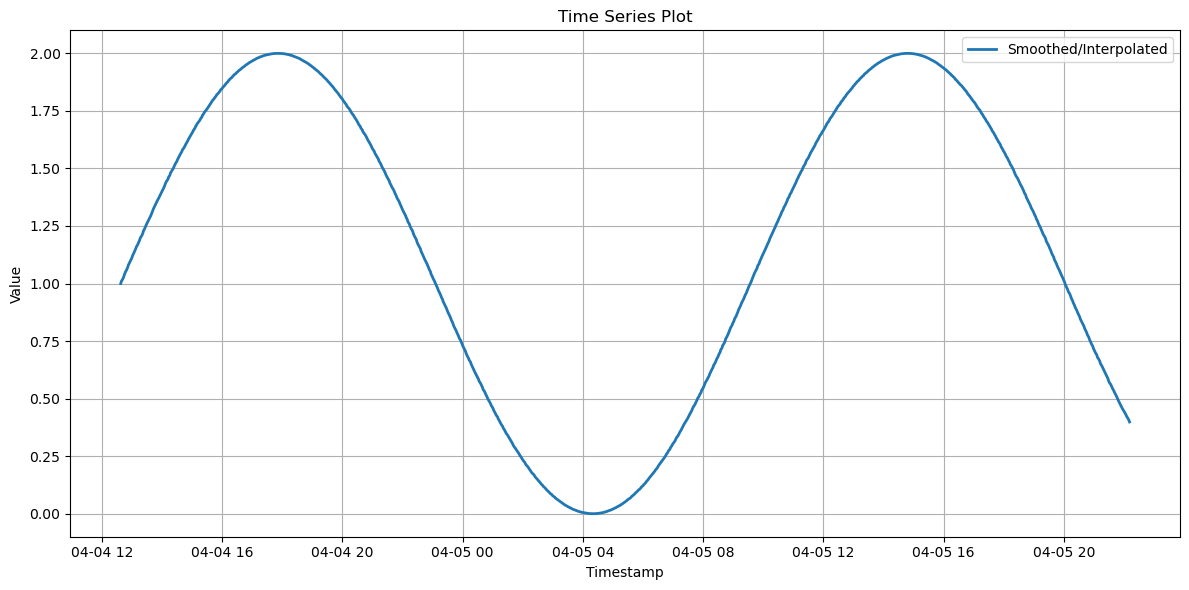

In [34]:
# Assume there's only one value column (other than the timestamp index)
value_column = df_interpolated.columns[0]

plt.figure(figsize=(12, 6))
plt.plot(df_interpolated.index, df_interpolated[value_column], label='Smoothed/Interpolated', linewidth=2)

plt.title("Time Series Plot")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

